# Hands-on Search Algorithms
## Artificial Intelligence Fundamentals 2023/24
Elia Piccoli (elia.piccoli@phd.unipi.it)

---

## Creating the virtual environment and installing required packages

Create the virtual environment and activate it.

You can use _venv_, _virtualenv_ or _conda_ whichever you prefer.

In [ ]:
python3 -m venv minihack
source minihack/bin/activate

Install _nle_ (https://github.com/facebookresearch/nle)

In [6]:
pip install nle

Note: you may need to restart the kernel to use updated packages.


Install _minihack_ (https://github.com/facebookresearch/minihack)

In [7]:
pip install minihack

Note: you may need to restart the kernel to use updated packages.


Install other packages needed for this hands-on (_matplotlib_ for plots, _notebook_ for jupyter notebooks)

In [8]:
pip install matplotlib notebook

Note: you may need to restart the kernel to use updated packages.


Activate the jupyter server and access it by the localhost at the given port (usually 8888 or around that number)

In [ ]:
jupyter notebook

---

## Creating minihack environments and their features

In [1]:
import gymnasium as gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

Show list of all minihack environments

In [2]:
!python -m minihack.scripts.env_list

MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

Create and render the environment

In [5]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0").unwrapped
# reset it to initial state
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|.... ..... ........|                                                           
|.. .   ... .   .  .|                                                           
|.. ... .>. ... ....|                                                           
|..   . ...   .   ..|                                                           
|@... ....... ... ..|                                                           
|..     ... .     ..|                                                           
|.......... ........|      

Using the env instance is possible to print the available actions

In [6]:
env.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>,
 <Command.OPEN: 111>,
 <Command.KICK: 4>,
 <Command.SEARCH: 115>,
 <Command.EAT: 101>)

In [7]:
state

({'glyphs': array([[2359, 2359, 2359, ..., 2359, 2359, 2359],
         [2359, 2359, 2359, ..., 2359, 2359, 2359],
         [2359, 2359, 2359, ..., 2359, 2359, 2359],
         ...,
         [2359, 2359, 2359, ..., 2359, 2359, 2359],
         [2359, 2359, 2359, ..., 2359, 2359, 2359],
         [2359, 2359, 2359, ..., 2359, 2359, 2359]], dtype=int16),
  'chars': array([[32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32],
         ...,
         [32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32],
         [32, 32, 32, ..., 32, 32, 32]], dtype=uint8),
  'colors': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'specials': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,


Analyzing the state variable we can see all the different representations

check: https://minihack.readthedocs.io/en/latest/getting-started/observation_spaces.html

In our case we will consider only two representations:
- _chars_: represents the map using a multi-dimensional array containing the ASCII encoding of the characters
- _pixel_: stores the 3 channel informations to render visually the environment

In [15]:
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0", observation_keys=("chars", "pixel"))
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|.. ....... ... ....|                                                           
|@...   ... . .   ..|                                                           
|...... ..... ... ..|                                                           
|.    . ...     . ..|                                                           
|...... .>. ... . ..|                                                           
|..     ... .   . ..|                                                           
|.......... ........|      

Print the shape of the two representations

In [16]:
obs['chars'].shape, obs['pixel'].shape

((21, 79), (336, 1264, 3))

We can render visually the environment

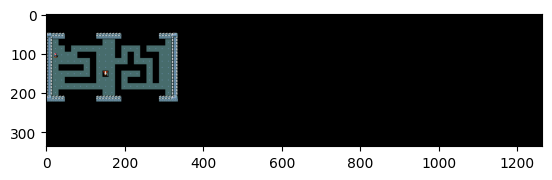

In [18]:
plt.imshow(obs['pixel'])

---

In [20]:
from utils import *
from algorithms import bfs, a_star

## Breadth-First Search (BFS)

```
procedure BFS(G, start_vertex):
    create a queue Q
    create a set visited
    enqueue start_vertex into Q
    add start_vertex to visited
    
    while Q is not empty:
        current_vertex = dequeue from Q
        process current_vertex
        
        for each neighbor in G.adjacent(current_vertex):
            if neighbor is not in visited:
                enqueue neighbor into Q
                add neighbor to visited

Create the first environment

In [36]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|.............. ............|                                                   
|.    . .   ...       .   ..|                                                   
|.... . ... ... ....... ....|                                                   
|.. .     .  .> .       .  .|                                                   
|.. ..... ..... . . ... . ..|                                                   
|..     .   ... . . . . . ..|                                                   
|.... . ... ... . ... . ...

Render the environment (we reduce the representation to remove usesless black space)

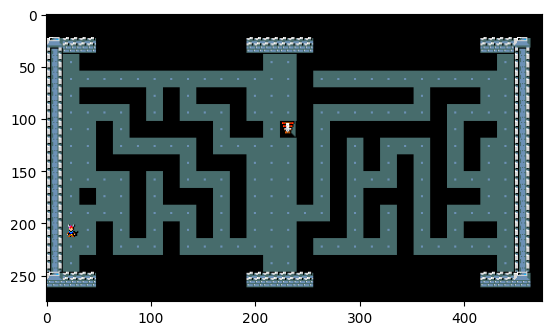

In [37]:
plt.imshow(obs['pixel'][25:300, :475])

Store the state ASCII representation, which will be used to compute the solution, and the pixel information

In [38]:
game_map = obs['chars']
game = obs['pixel']

Find the player (@) and the target (>) using the functions in _utils.py_

In [39]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (np.int64(14), np.int64(1))
Target position: (np.int64(8), np.int64(14))


Compute the solution finding the path to reach the target

In [40]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 0 ns, sys: 1.12 ms, total: 1.12 ms
Wall time: 1.69 ms


The expected output is a list of tuples that contains the (x, y) coordinates that the player has to visit in order to reach the target.

In [41]:
path

[(np.int64(14), np.int64(1)),
 (np.int64(13), np.int64(1)),
 (np.int64(12), np.int64(1)),
 (np.int64(11), np.int64(1)),
 (np.int64(10), np.int64(1)),
 (np.int64(9), np.int64(1)),
 (np.int64(8), np.int64(1)),
 (np.int64(7), np.int64(1)),
 (np.int64(6), np.int64(1)),
 (np.int64(5), np.int64(1)),
 (np.int64(5), np.int64(2)),
 (np.int64(5), np.int64(3)),
 (np.int64(5), np.int64(4)),
 (np.int64(5), np.int64(5)),
 (np.int64(5), np.int64(6)),
 (np.int64(5), np.int64(7)),
 (np.int64(5), np.int64(8)),
 (np.int64(5), np.int64(9)),
 (np.int64(5), np.int64(10)),
 (np.int64(5), np.int64(11)),
 (np.int64(5), np.int64(12)),
 (np.int64(6), np.int64(12)),
 (np.int64(7), np.int64(12)),
 (np.int64(7), np.int64(13)),
 (np.int64(8), np.int64(13)),
 (np.int64(8), np.int64(14))]

From the sequence of (x, y) coordinates compute the actual actions.

In [42]:
actions = actions_from_path(start, path[1:])

In [43]:
actions

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1]

Iterate over actions and render the environment to see the solution.

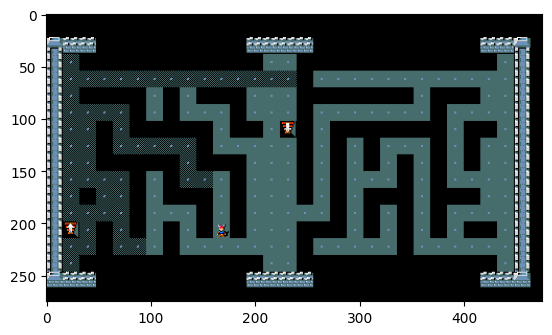

In [48]:
image = plt.imshow(game[25:300, :475])
import time
for action in actions:
    s, reward, terminated, truncated, info = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])
    time.sleep(.1)

---

## Using custom des files
- https://minihack-editor.github.io/
- https://minihack.readthedocs.io/en/latest/tutorials/des_file_tutorial.html

In [49]:
env = gym.make(
    "MiniHack-Room-Monster-15x15-v0",
    observation_keys=("chars", "pixel"),
)
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ........F......                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                .........d.....                                 
                                ...............                                 
                                ..........@....                                 
                           

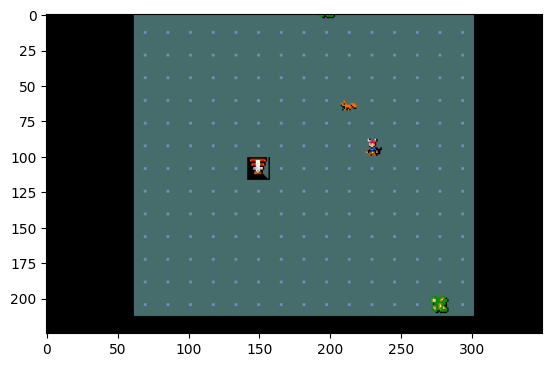

In [50]:
plt.imshow(obs['pixel'][75:300, 450:800])

In [51]:
game_map = obs['chars']
game = obs['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [52]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 2.05 ms, sys: 146 µs, total: 2.2 ms
Wall time: 2.07 ms


In [53]:
actions = actions_from_path(start, path[1:])

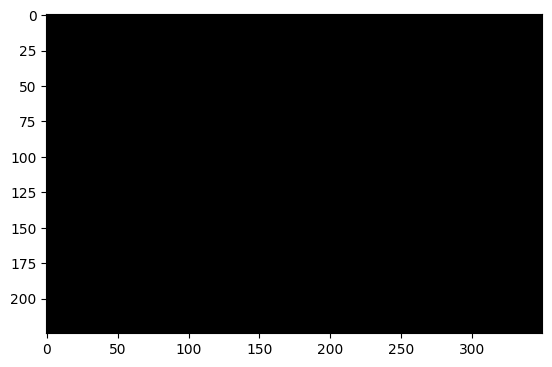

In [54]:
image = plt.imshow(game[75:300, 450:800])
import time
for action in actions:
    s, _, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])
    time.sleep(.4)

---

In [55]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

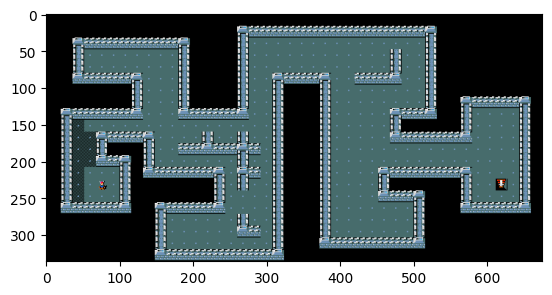

In [56]:
plt.imshow(obs['pixel'][:, 300:975])

In [57]:
game_map = obs['chars']
game = obs['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [58]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 2.79 ms, sys: 0 ns, total: 2.79 ms
Wall time: 2.76 ms


In [59]:
actions = actions_from_path(start, path[1:])

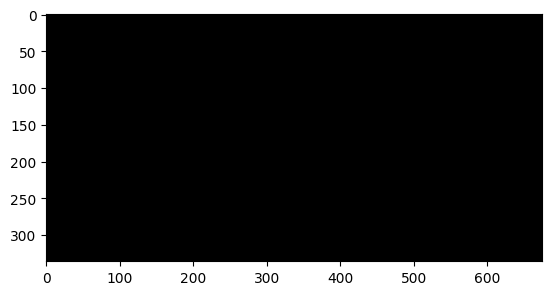

In [60]:
image = plt.imshow(game[:, 300:975])
import time
for action in actions:
    s, _, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

## A* Search Algorithm

A* (star) Pathfinding
```
// Initialize both open and closed list  
let the openList equal empty list of nodes  
let the closedList equal empty list of nodes
// Add the start node  
put the startNode on the openList
// Loop until you find the end  
while the openList is not empty
	// Get the current node  
    let the currentNode equal the node with the least f value  
    remove the currentNode from the openList  
    add the currentNode to the closedList
    // Check if found the goal  
    if currentNode is the goal  
        Congratz! You've found the end! Backtrack to get path
	
	// Generate children  
    let the children of the currentNode equal the adjacent nodes  
      
    for each child in the children 
	    // Check if child is on the closedList  
        if child is in the closedList  
            continue to beginning of for loop
        
        // Create the f, g, and h values  
        child.g = currentNode.g + distance between child and current  
        child.h = distance from child to end  
        child.f = child.g + child.h
        
        // Child is already in openList  
        if child.position is in the openList's nodes positions  
            if the child.g is higher than the openList node's g  
                continue to beginning of for loop
        
        // Add the child to the openList  
        add the child to the openList

In [61]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|.... ......... . ..........|                                                   
|.. .       ..> . .       ..|                                                   
|@. ... ....... . . ... ....|                                                   
|..   . .    .. . . . . .  .|                                                   
|.... . ....... ..... . ....|                                                   
|..   .     ... .         ..|                                                   
|.... ... ..... ... ... ...

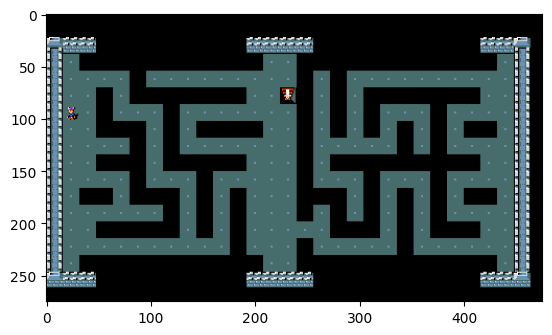

In [62]:
plt.imshow(obs['pixel'][25:300, :475])

In [63]:
game_map = obs['chars']
game = obs['pixel']

In [64]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (np.int64(7), np.int64(1))
Target position: (np.int64(6), np.int64(14))


In [65]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 5.89 ms, sys: 0 ns, total: 5.89 ms
Wall time: 5.86 ms


In [66]:
actions = actions_from_path(start, path[1:])

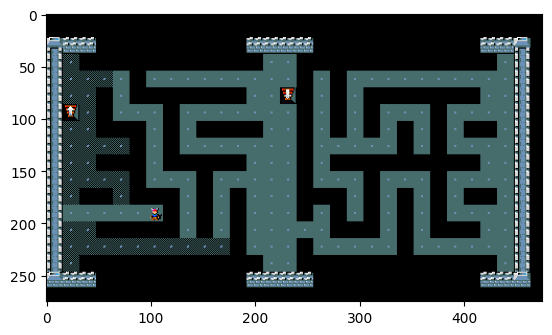

In [72]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

---

In [74]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

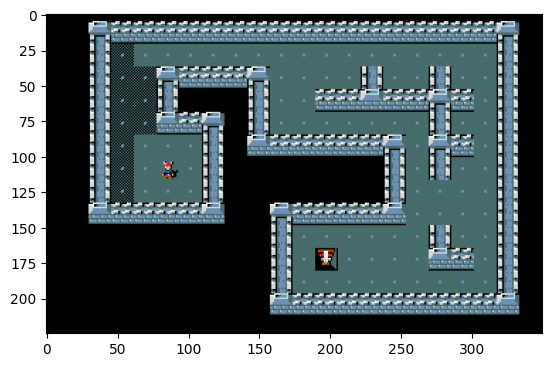

In [76]:
plt.imshow(obs['pixel'][75:300, 450:800])

In [77]:
game_map = obs['chars']
game = obs['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [78]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 2.49 ms, sys: 22 µs, total: 2.51 ms
Wall time: 2.38 ms


In [79]:
actions = actions_from_path(start, path[1:])

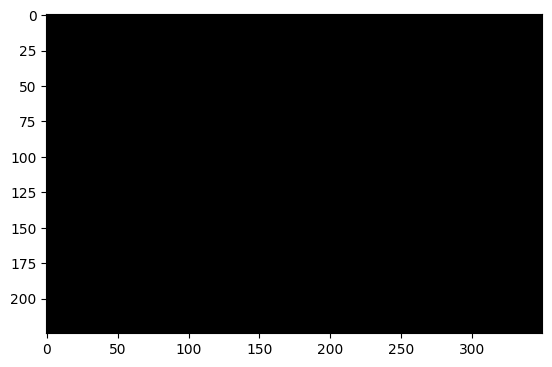

In [80]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

---

In [82]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

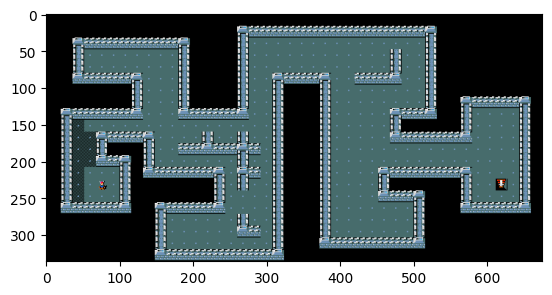

In [84]:
plt.imshow(obs['pixel'][:, 300:975])

In [86]:
game_map = obs['chars']
game = obs['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [87]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 16.2 ms, sys: 0 ns, total: 16.2 ms
Wall time: 14.6 ms


In [88]:
actions = actions_from_path(start, path[1:])

RuntimeError: Called step on finished NetHack

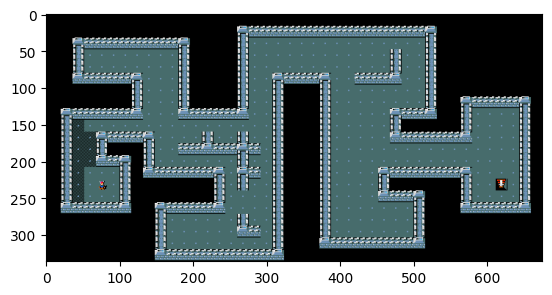

In [92]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _, _= env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

Using the '_crop_' combined with some observation keys, it returns a view centered around the agent.
Usually is 9x9, but can be modified at preference.

In [93]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "complex_maze.des",
)
obs, info = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

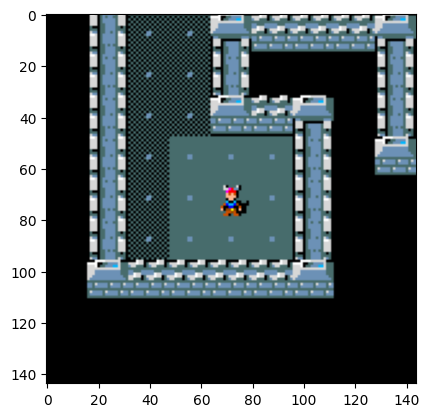

In [94]:
plt.imshow(obs['pixel_crop'])

In [95]:
game_map = obs['chars']
game = obs['pixel_crop']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [96]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 15.9 ms, sys: 208 µs, total: 16.1 ms
Wall time: 15.7 ms


In [97]:
actions = actions_from_path(start, path[1:])

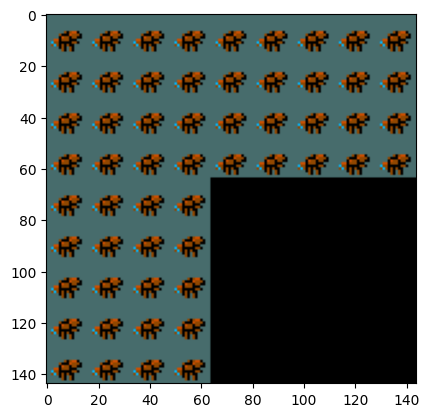

In [98]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])